In [22]:
#load modules
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [6]:
#load file 'all_data.csv'

row_df = pd.read_csv('all_data.csv')
#data looks clean
row_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB


In [12]:
row_df.rename(columns={'Life expectancy at birth (years)': 'Life_expectancy'}, inplace = True)
row_df.head()

,Country,Year,Life_expectancy,GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


In [13]:
row_df.describe(include='all')

,Country,Year,Life_expectancy,GDP
count,96,96.000000,96.000000,9.600000e+01
unique,6,NaN,NaN,NaN
top,Zimbabwe,NaN,NaN,NaN
freq,16,NaN,NaN,NaN
mean,NaN,2007.500000,72.789583,3.880499e+12
std,NaN,4.633971,10.672882,5.197561e+12
min,NaN,2000.000000,44.300000,4.415703e+09
25%,NaN,2003.750000,74.475000,1.733018e+11
50%,NaN,2007.500000,76.750000,1.280220e+12
75%,NaN,2011.250000,78.900000,4.067510e+12


Text(0.5, 1.0, 'Avg life expectancy changes from 2000 to 2015')

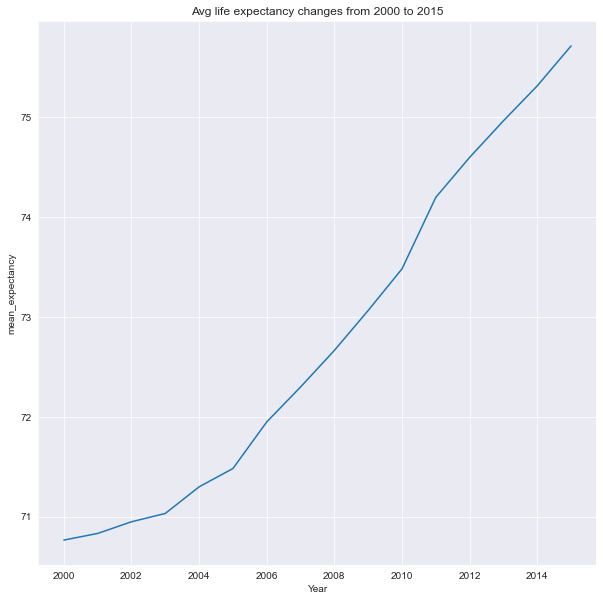

In [76]:
df = row_df.groupby('Year').agg(mean_expectancy = ('Life_expectancy', 'mean'))
plt.figure(figsize=(10, 10))
sns.set_style('darkgrid')
sns.lineplot(data = df, x = 'Year', y = 'mean_expectancy')
plt.title('Avg life expectancy changes from 2000 to 2015')

Text(0.5, 1.0, 'Avg life expectancy changes from 2000 to 2015')

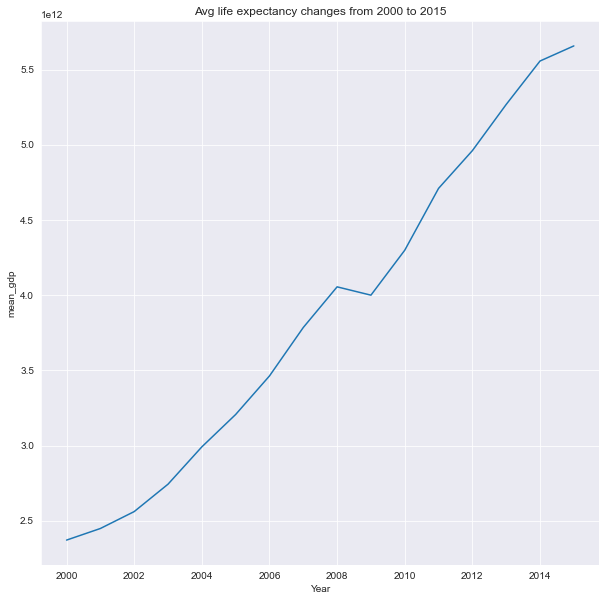

In [77]:
df = row_df.groupby('Year').agg(mean_gdp = ('GDP', 'mean'))
plt.figure(figsize=(10, 10))
sns.set_style('darkgrid')
sns.lineplot(data = df, x = 'Year', y = 'mean_gdp')
plt.title('Avg life expectancy changes from 2000 to 2015')

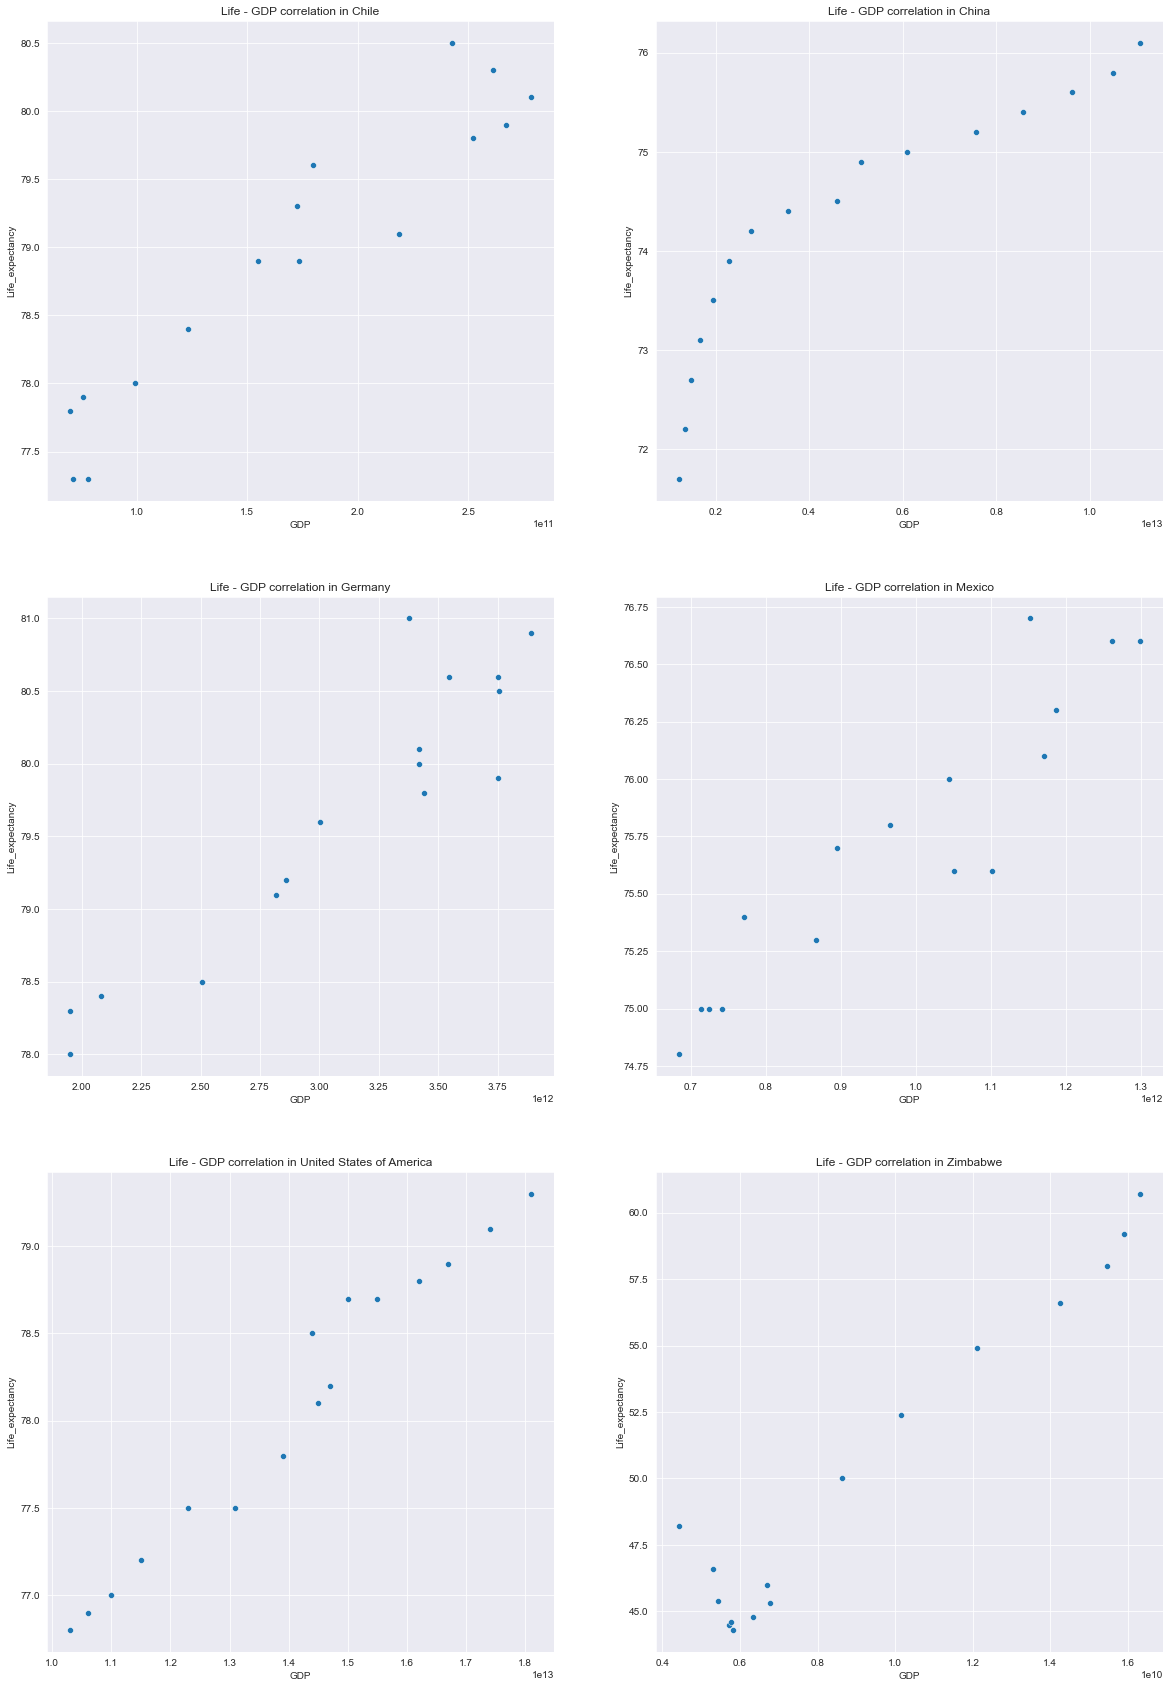

In [79]:
def get_gdp_expectancy_per_country (df):
    countries = df.Country.unique()
    plt.figure(figsize = (20, 30))
    x = 1
    for country in countries:
        plt.subplot(int(len(countries)/2), 2, x)
        country_df = df[df.Country == country]
        sns.scatterplot(data = country_df, x= 'GDP', y = 'Life_expectancy')
        plt.title('Life - GDP correlation in {}'.format(country))
        x +=1
        
get_gdp_expectancy_per_country(row_df)    
        

We can see that there is stron postitive correlation between life expectancy and GDP

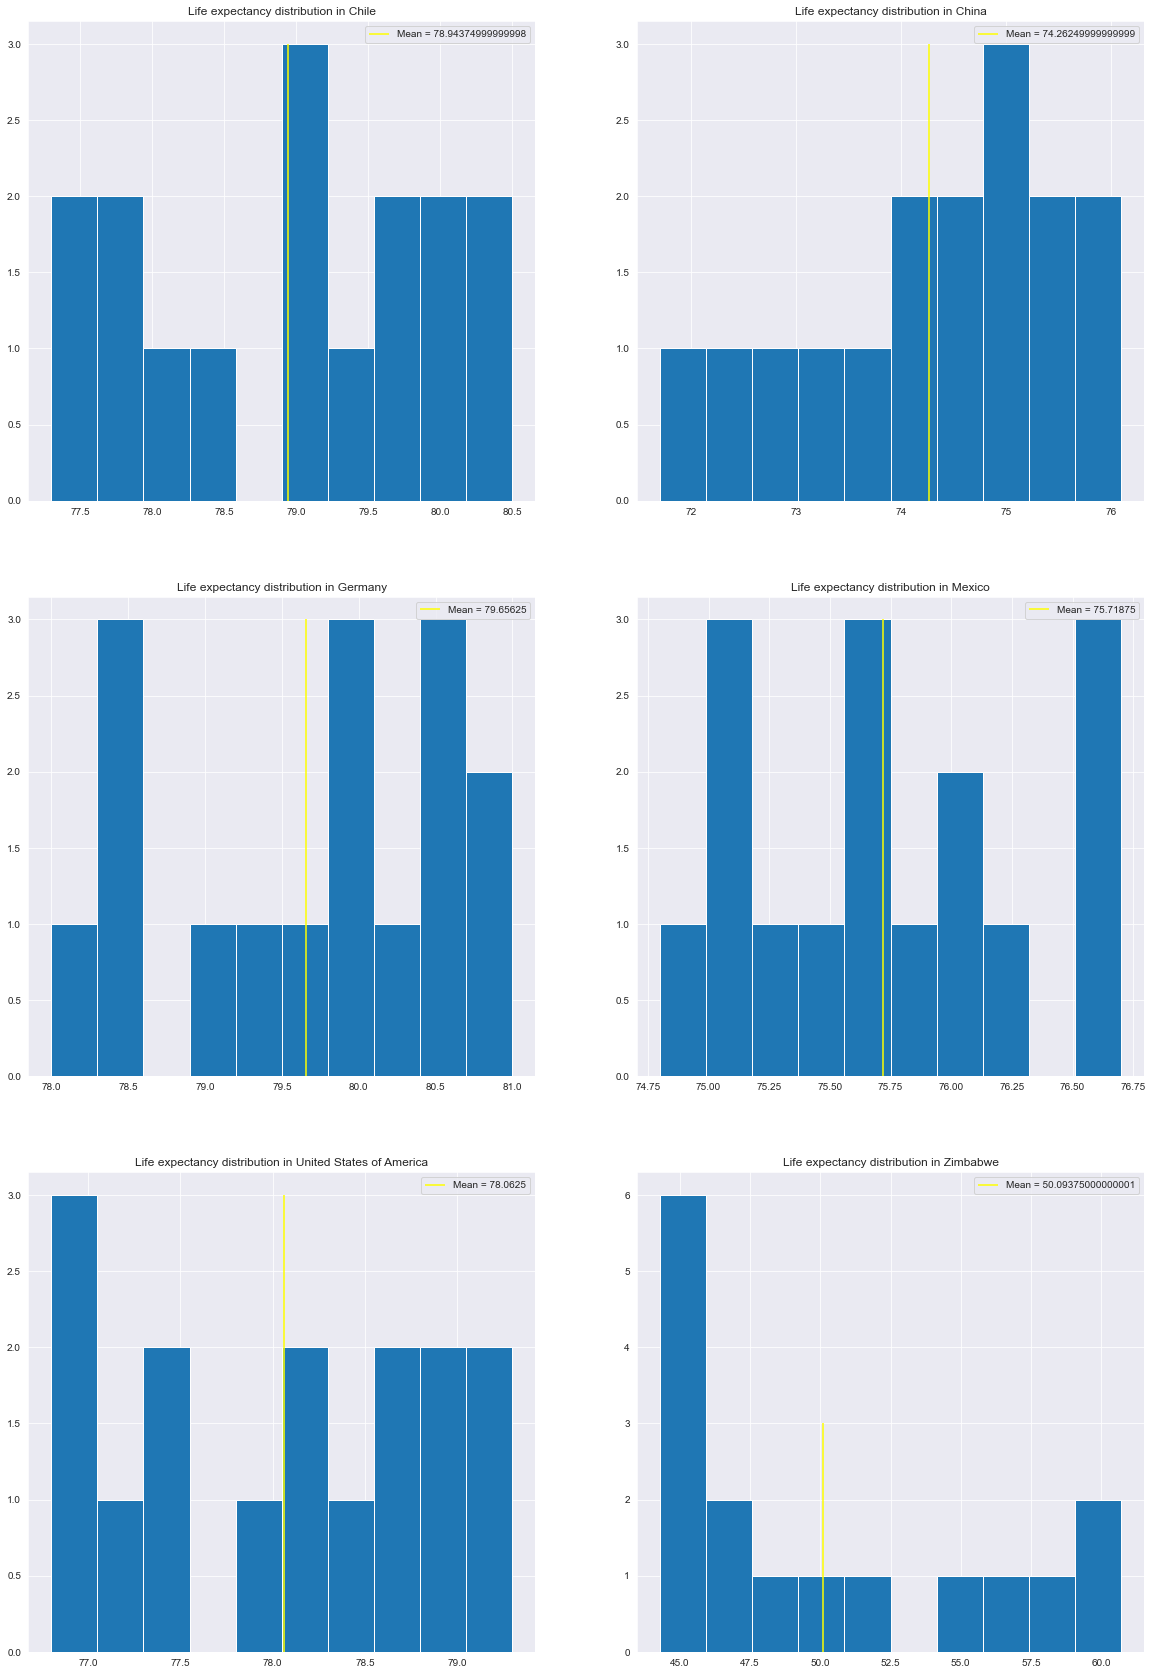

In [81]:
def life_displot_countries(df):
    countries = df.Country.unique()
    plt.figure(figsize = (20, 30))
    x = 1
    for country in countries:
        plt.subplot(int(len(countries)/2), 2, x)
        #print(df[df.Country == country].Life_expectancy)
        #sns.displot(df[df.Country == country].Life_expectancy, bins = 10)
        plt.hist(df[df.Country == country].Life_expectancy, bins = 10)
        label = 'Mean = {}'.format(df[df.Country == country].Life_expectancy.mean())
        plt.vlines(df[df.Country == country].Life_expectancy.mean(), ymin = 0, ymax = 3, color = 'yellow', label = label)
        plt.legend()
        plt.title('Life expectancy distribution in {}'.format(country))
        x += 1
        #plt.show()
        
life_displot_countries(row_df)        

Text(0.5, 1.0, 'Life expectancy distribution')

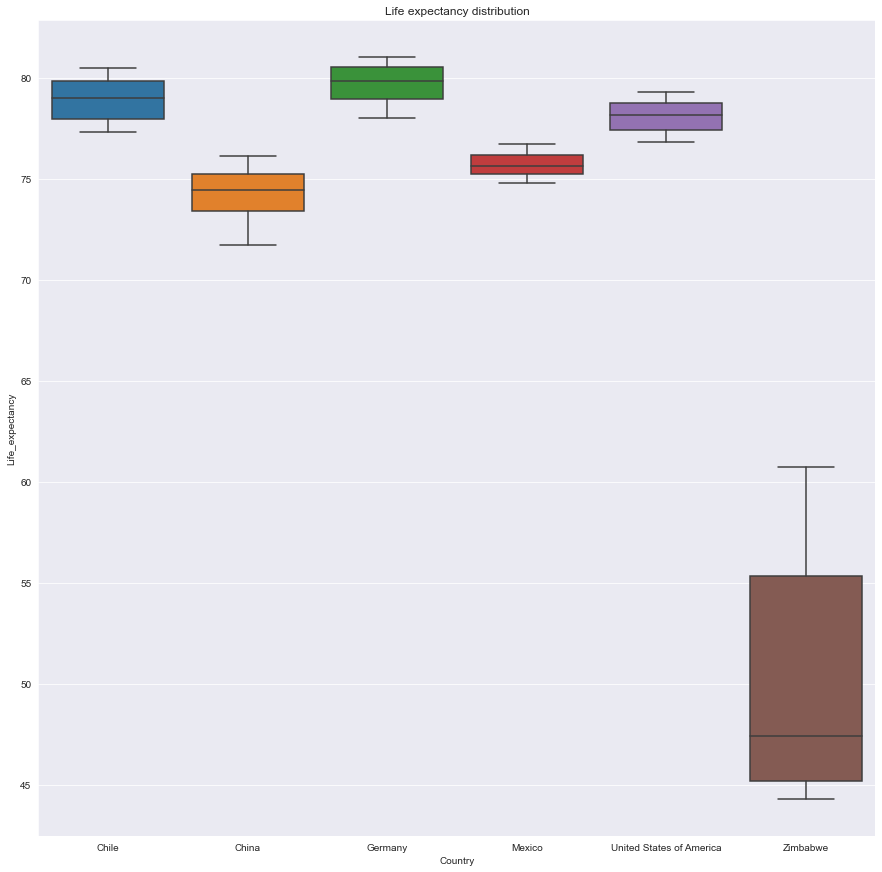

In [87]:
plt.figure(figsize=(15, 15))
sns.boxplot(data=row_df, x = 'Country', y='Life_expectancy')
plt.title('Life expectancy distribution')

Zimbabwe has lowers life expectancy, while Germnay has best values.

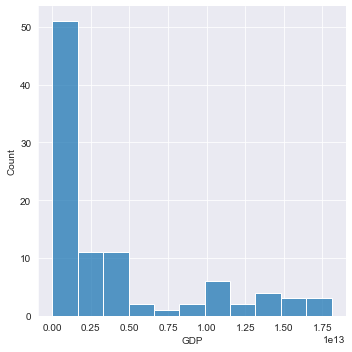

In [100]:
sns.displot(row_df.GDP)

row_df['log_gdp'] = np.log(row_df.GDP)


As GDP is very right-skewed, let's use log(GDP) to build correlation between GDP and life expectancy

Text(0.5, 1.0, 'GPD life expectancy correlation with coutnry hue')

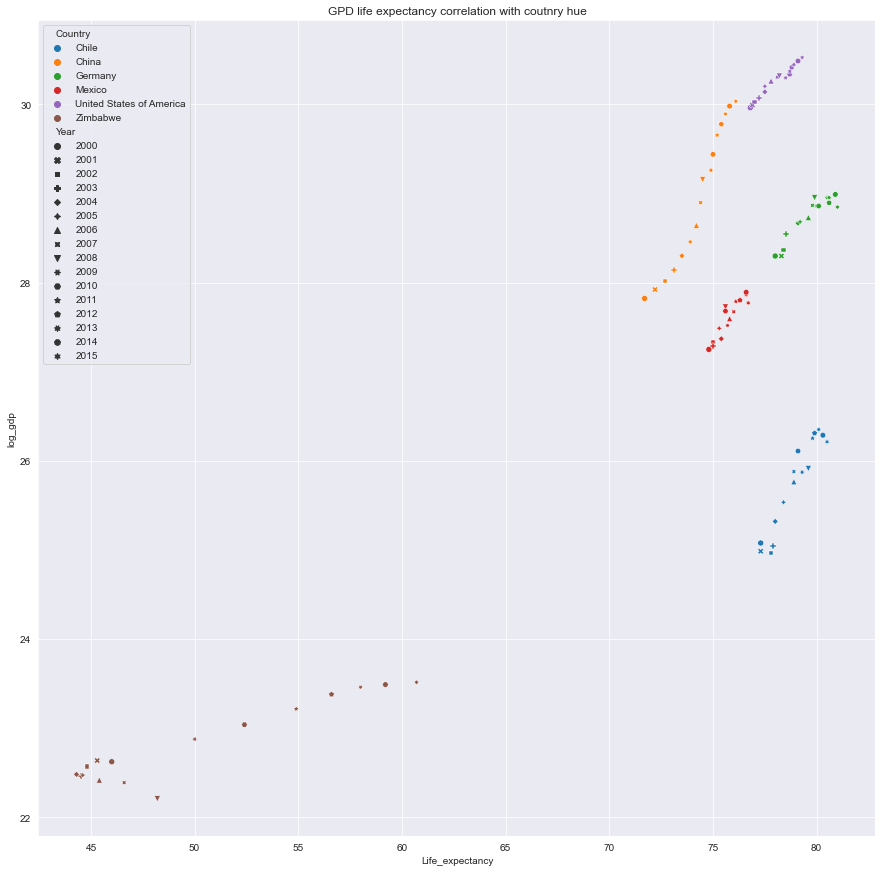

In [103]:
plt.figure(figsize=(15, 15))
sns.scatterplot(data=row_df, x = 'Life_expectancy', y='log_gdp', hue = 'Country', style = 'Year')
plt.title('GPD life expectancy correlation with coutnry hue')

The plot above shows that Zimbabwe has lowest GDP and life expectancy.
China has best improvement of GDP over these years.